In [127]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logoforwebsite/Component 7-2.png
/kaggle/input/nlpqqpairs/train.csv


In [128]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            31Gi        13Gi        12Gi       0.0Ki       5.4Gi        17Gi
Swap:             0B          0B          0B


In [129]:
!pip install distance fuzzywuzzy streamlit pyngrok

In [130]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Load data using Vaex (using memory efficiently)
data = pd.read_csv('/kaggle/input/nlpqqpairs/train.csv')


In [131]:
data.isnull().sum()
#we are not gonna do anything about it because the dataset is huge and it won't affect anything to just igmore a few

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [132]:
data.duplicated().sum()#None duplicated

0

In [133]:
#now I am checking the balance between duplicated(1) and non duplicated(0) so that we can know which is more or less to increase the efficiency
data['is_duplicate'].value_counts()

is_duplicate
0    255027
1    149263
Name: count, dtype: int64

In [134]:
#percentage
data['is_duplicate'].value_counts(normalize=True)*100

is_duplicate
0    63.080215
1    36.919785
Name: proportion, dtype: float64

In [135]:
#checking repeated questions
qid = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())
print(f'number of unique questions {np.unique(qid).shape[0]}')
x = qid.value_counts()>1
print(f'number of repeated questions {x[x].shape[0]}')

number of unique questions 537933
number of repeated questions 111780


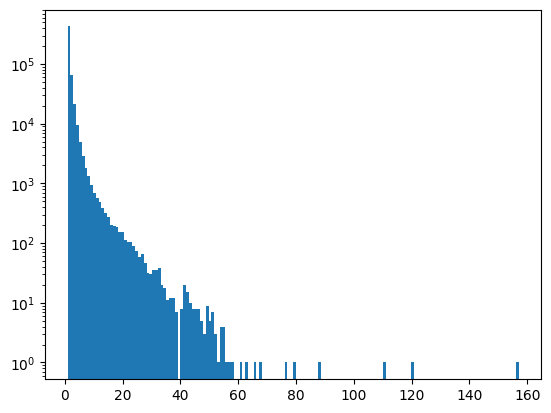

In [136]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [137]:
data.shape

(404290, 6)

In [206]:
new_df = data.sample(50000, random_state=42)
new_df.shape

(50000, 6)

is_duplicate
0    31547
1    18453
Name: count, dtype: int64
is_duplicate
0    63.094
1    36.906
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

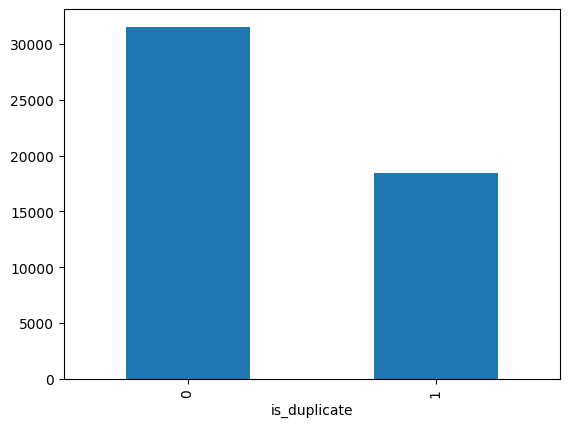

In [207]:
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')


In [208]:
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 89109
Number of questions getting repeated 7329


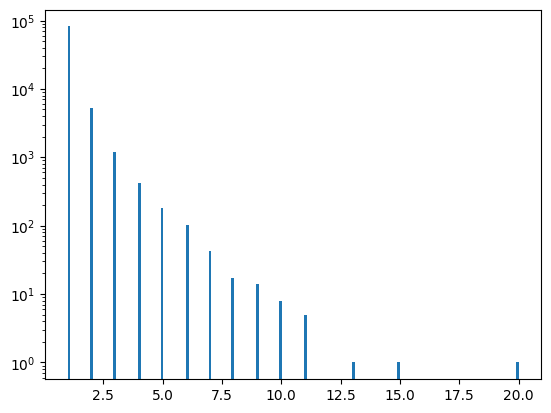

In [209]:

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()


In [210]:
ques_df = new_df[['question1','question2']]
from sklearn.feature_extraction.text import CountVectorizer
# merge texts and converting all the categorical data into numerical
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape


(50000, 6000)

In [143]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [145]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
8067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
73186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
279281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [212]:
import gc
gc.collect()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7583

In [214]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            31Gi        19Gi       9.9Gi       0.0Ki       1.5Gi        10Gi
Swap:             0B          0B          0B


In [213]:
import gc
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Convert DataFrame to lower precision to reduce memory usage
temp_df = temp_df.astype(np.float32)

# Run garbage collection to free up memory
gc.collect()

# Split the data into X (features) and y (target variable)
X = temp_df.iloc[:, :-1].values.astype(np.float32)
y = temp_df.iloc[:, -1].values.astype(np.int32)

# Free up memory by running garbage collection after loading data
gc.collect()

# Perform the train-test split with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize the XGBoost Classifier with default parameters
xgb = XGBClassifier(n_jobs=1, max_depth=10, use_label_encoder=False)

# Train the model on the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Run garbage collection after predictions
gc.collect()

# Print the accuracy
print(f'Accuracy: {accuracy}')


Accuracy: 0.7471


#Now we are Now we are going to do feature engineering and in that we are going to add seven new features. Q1. Length means character length of question 1. Q2. Length means character length of Q2. Q1. Words means words in question 1. Q2. Words mean words in question 2. Q2. Word common. Character of common unique words means in the corpus all the common unique words. Word total, total Number of words in Quotient 1 plus total number of words in Quotient 2, then word share, word common divided by word total.


In [215]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()
gc.collect()

0

In [216]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()
gc.collect()

0

In [217]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()
gc.collect()

0

In [218]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))
  #this piece of code will take a sentence and then separate it , put it in a list and then make it unique.

new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()
gc.collect()

0

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


minimum characters 1
maximum characters 430
average num of characters 59


138

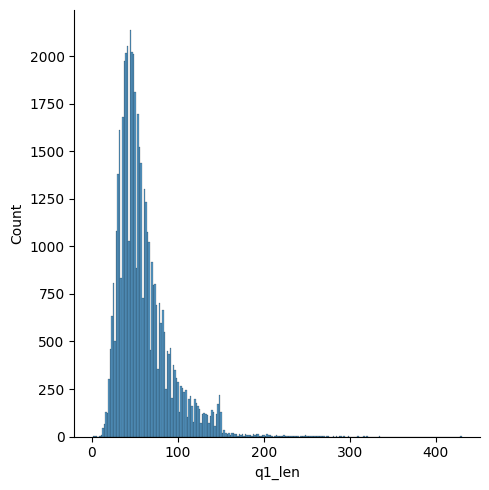

In [219]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))
gc.collect()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


minimum characters 1
maximum characters 1169
average num of characters 59


11736

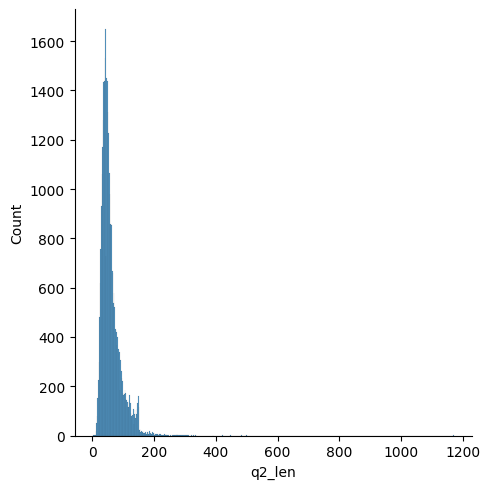

In [154]:
#Second analysis
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))
gc.collect()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


minimum words 1
maximum words 67
average num of words 10


33774

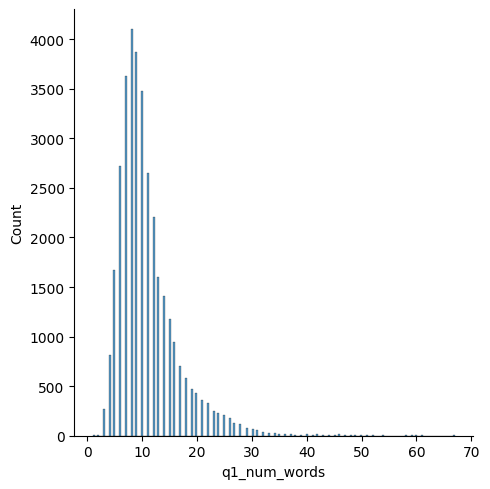

In [155]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))
gc.collect()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


minimum words 1
maximum words 228
average num of words 11


12583

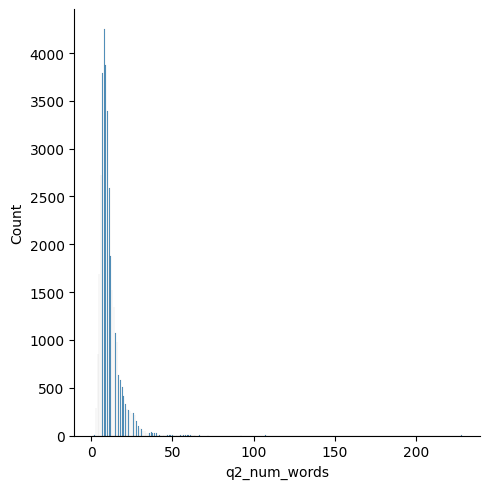

In [156]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))
gc.collect()

/tmp/ipykernel_31/2982849372.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_31/2982849372.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `h

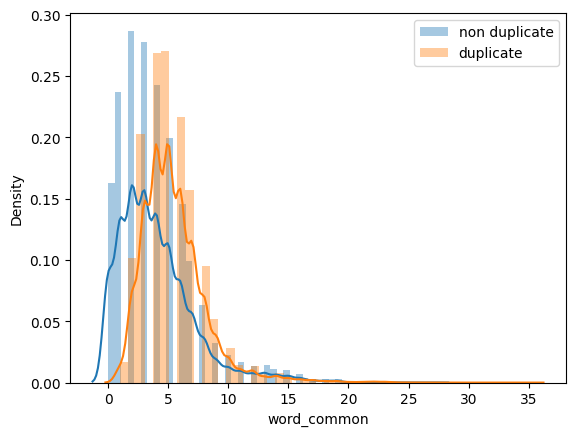

34620

In [157]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()
gc.collect()

/tmp/ipykernel_31/741588842.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_31/741588842.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `hist

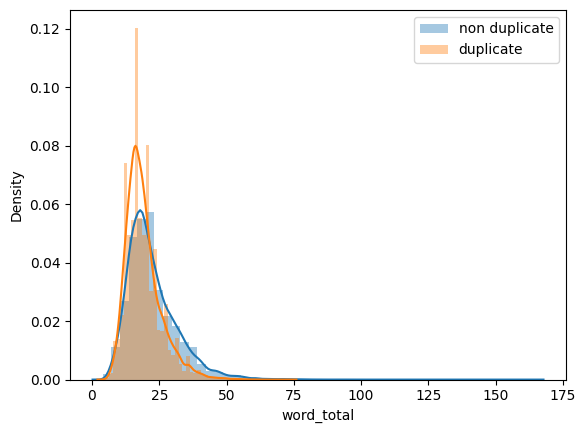

8589

In [158]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()
gc.collect()

In [159]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            31Gi        14Gi        11Gi       0.0Ki       5.4Gi        16Gi
Swap:             0B          0B          0B


/tmp/ipykernel_31/3178699612.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_31/3178699612.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `hi

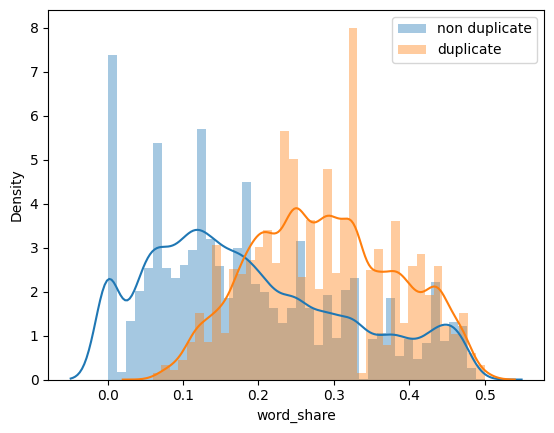

In [220]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()


In [221]:
ques_df = new_df[['question1','question2']]
ques_df.head()


,question1,question2
8067,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?
368101,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...
70497,Which is more advisable and better material fo...,What is the best server setup for buddypress?
226567,How do I improve logical programming skills?,How can I improve my logical skills for progra...
73186,How close we are to see 3rd world war?,How close is a World War III?


In [222]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()
#here we are dropping everything that we had before to make things more clear to the algorithm

(50000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
8067,0,34,34,8,8,7,16,0.44
368101,0,53,51,11,9,6,20,0.30
70497,0,96,45,16,8,2,24,0.08
226567,1,44,52,7,9,4,16,0.25
73186,1,38,29,9,7,3,16,0.19


In [223]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)


In [224]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape


(50000, 6000)

In [225]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(50000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,34,34,8,8,7,16,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0
368101,0,53,51,11,9,6,20,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
70497,0,96,45,16,8,2,24,0.08,0,0,...,0,0,0,0,0,0,0,0,0,0
226567,1,44,52,7,9,4,16,0.25,0,0,...,0,0,0,0,0,0,0,0,0,0
73186,1,38,29,9,7,3,16,0.19,0,0,...,0,0,0,0,0,0,0,0,0,0


In [226]:
import gc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Run garbage collection before starting
gc.collect()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:, 1:].values, final_df.iloc[:, 0].values, test_size=0.2, random_state=1)

# Run garbage collection after splitting
gc.collect()

# Train the Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Run garbage collection after training
gc.collect()

# Predict the test set
y_pred = rf.predict(X_test)

# Run garbage collection after prediction
gc.collect()

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the result
print(f'The accuracy is {accuracy * 100:.2f}%')

# Final garbage collection after everything
gc.collect()

The accuracy is 78.41%


0

#the accuracy increased

In [167]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            31Gi        17Gi       9.7Gi       0.0Ki       4.0Gi        13Gi
Swap:             0B          0B          0B


In [168]:
from xgboost import XGBClassifier
gc.collect()
xgb = XGBClassifier()
gc.collect()
xgb.fit(X_train,y_train)
gc.collect()
y_pred = xgb.predict(X_test)
gc.collect()
accuracy_score(y_test,y_pred)
gc.collect()
print(f'the accuracy is {accuracy*100}')
gc.collect()

the accuracy is 77.64285714285715


0

In [228]:
#Finding the common words
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

new_df['word_common'] = new_df.apply(common_words, axis=1)
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,16,0.44
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,6,20,0.30
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8,2,24,0.08
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9,4,16,0.25
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7,3,16,0.19


All of these were Basic Features that we applied now we are gonna be applying the advanced set of features which are as follows -

Token Features

cwc_min: This is the ratio of the number of common words to the length of the smaller question

cwc_max: This is the ratio of the number of common words to the length of the larger question

csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions

csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions

ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions

ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions

last_word_eq: 1 if the last word in the two questions is same, 0 otherwise

first_word_eq: 1 if the first word in the two questions is same, 0 otherwise

Length Based Features

mean_len: Mean of the length of the two questions (number of words)

abs_len_diff: Absolute difference between the length of the two questions (number of words)

longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question

Fuzzy Features fuzz_ratio: fuzz_ratio score from fuzzywuzzy

fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy

token_sort_ratio: token_sort_ratio from fuzzywuzzy

token_set_ratio: token_set_ratio from fuzzywuzzy

In [229]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features




token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [230]:
#checking the update
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,...,16,0.44,0.833319,0.833319,0.999950,0.999950,0.874989,0.874989,0,1
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,...,20,0.30,0.499992,0.499992,0.999967,0.599988,0.666659,0.545450,0,1
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8,...,24,0.08,0.000000,0.000000,0.666644,0.285710,0.249997,0.124999,0,0
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9,...,16,0.25,0.666656,0.666656,0.000000,0.000000,0.571420,0.444440,0,1
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7,...,16,0.19,0.399992,0.333328,0.000000,0.000000,0.285710,0.222220,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16314,16314,31109,31110,Are electrons moving about the nucleus a sort ...,How does an electron move outside the nucleus?,0,159,46,28,8,...,32,0.03,0.000000,0.000000,0.333322,0.099999,0.124998,0.035714,0,0
258955,258955,6119,62369,How do I gain weight in naturally way?,How can I gain weight but also eat healthy?,1,38,43,8,9,...,17,0.24,0.666656,0.571420,0.000000,0.000000,0.499994,0.444440,0,1
174632,174632,269083,269084,What are some good institutes for civil servic...,Which is the best coaching institute for civil...,1,71,69,11,11,...,22,0.27,0.571420,0.571420,0.499988,0.499988,0.545450,0.545450,1,0
337708,337708,465179,465180,How many enterprises are there in the world?,How many enterprise exist in the world?,1,44,39,8,7,...,15,0.33,0.749981,0.599988,0.999950,0.499988,0.714276,0.624992,1,1


In [231]:
import distance

def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    strs = list(distance.lcsubstrings(q1, q2))
    if strs:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0  # No common substring

    return length_features

length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,...,0.833319,0.999950,0.999950,0.874989,0.874989,0,1,0,8.0,0.800000
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,...,0.499992,0.999967,0.599988,0.666659,0.545450,0,1,2,10.0,0.326923
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8,...,0.000000,0.666644,0.285710,0.249997,0.124999,0,0,8,12.0,0.108696
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9,...,0.666656,0.000000,0.000000,0.571420,0.444440,0,1,2,8.0,0.266667
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7,...,0.333328,0.000000,0.000000,0.285710,0.222220,0,1,2,8.0,0.333333


In [244]:
#Now creating fuzzy feature form the fuzzywuzzy library
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))


In [234]:
print(new_df.shape)
new_df.head()

(50000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,...,0.874989,0,1,0,8.0,0.800000,88,88,81,90
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,...,0.545450,0,1,2,10.0,0.326923,73,73,73,73
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8,...,0.124999,0,0,8,12.0,0.108696,35,44,36,24
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9,...,0.444440,0,1,2,8.0,0.266667,72,68,89,96
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7,...,0.222220,0,1,2,8.0,0.333333,68,59,71,81


In [235]:
import re
from bs4 import BeautifulSoup
import distance
from fuzzywuzzy import fuzz
import pickle
import numpy as np
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

with open('stopwords.pkl', 'wb') as f:
    pickle.dump(stop_words, f)

def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))


def test_fetch_token_features(q1, q2):
    SAFE_DIV = 0.0001

    STOP_WORDS = pickle.load(open('stopwords.pkl','rb'))

    token_features = [0.0] * 8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    # Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features


def test_fetch_length_features(q1, q2):
    length_features = [0.0] * 3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features


def test_fetch_fuzzy_features(q1, q2):
    fuzzy_features = [0.0] * 4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features


def preprocess(q):
    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "can not",
        "can't've": "can not have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    return q


def query_point_creator(q1, q2):
    input_query = []

    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)

    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))

    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))

    input_query.append(test_common_words(q1, q2))
    input_query.append(test_total_words(q1, q2))
    input_query.append(round(test_common_words(q1, q2) / test_total_words(q1, q2), 2))

    # fetch token features
    token_features = test_fetch_token_features(q1, q2)
    input_query.extend(token_features)

    # fetch length based features
    length_features = test_fetch_length_features(q1, q2)
    input_query.extend(length_features)

    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1, q2)
    input_query.extend(fuzzy_features)

    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()

    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()

    return np.hstack((np.array(input_query).reshape(1, 22), q1_bow, q2_bow))

In [236]:
#Writing the whole code in one to make it easy to understand and also writing it in a filed anmed helper.py to make it more accessible
script_content = """
import re
from bs4 import BeautifulSoup
import distance
from fuzzywuzzy import fuzz
import pickle
import numpy as np

cv = pickle.load(open('cv.pkl','rb'))
import pickle
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

with open('stopwords.pkl', 'wb') as f:
    pickle.dump(stop_words, f)

def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))


def test_fetch_token_features(q1, q2):
    SAFE_DIV = 0.0001

    STOP_WORDS = pickle.load(open('stopwords.pkl','rb'))

    token_features = [0.0] * 8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    # Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features


def test_fetch_length_features(q1, q2):
    length_features = [0.0] * 3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features


def test_fetch_fuzzy_features(q1, q2):
    fuzzy_features = [0.0] * 4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features


def preprocess(q):
    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "can not",
        "can't've": "can not have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    return q


def query_point_creator(q1, q2):
    input_query = []

    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)

    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))

    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))

    input_query.append(test_common_words(q1, q2))
    input_query.append(test_total_words(q1, q2))
    input_query.append(round(test_common_words(q1, q2) / test_total_words(q1, q2), 2))

    # fetch token features
    token_features = test_fetch_token_features(q1, q2)
    input_query.extend(token_features)

    # fetch length based features
    length_features = test_fetch_length_features(q1, q2)
    input_query.extend(length_features)

    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1, q2)
    input_query.extend(fuzzy_features)

    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()

    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()

    return np.hstack((np.array(input_query).reshape(1, 22), q1_bow, q2_bow))"""
with open("/kaggle/working/helper.py", "w") as f:
    f.write(script_content)

In [237]:
import os
os.listdir('/kaggle/working')#Checking the directories to see whether it is being saved or not

['stopwords.pkl',
 'cv.pkl',
 'model.pkl',
 '__pycache__',
 'helper.py',
 'Component 7-2.png',
 'app.py',
 'setup.sh',
 '.virtual_documents',
 'requirements.txt']

In [238]:
print(preprocess("I've already! wasn't <b>done</b>?"))

new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)
#new_df.head()
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()
#Now in this code we are testing the preprocessing function as well as creating some new features

i have already  was not done


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,...,0.874989,0,1,0,8.0,0.800000,88,88,81,90
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9,...,0.545450,0,1,2,10.0,0.326923,73,73,73,73
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,95,44,17,8,...,0.124999,0,0,8,12.0,0.108696,35,44,36,24
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9,...,0.444440,0,1,2,8.0,0.266667,72,68,89,96
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,...,0.222220,0,1,2,8.0,0.333333,68,59,71,81


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

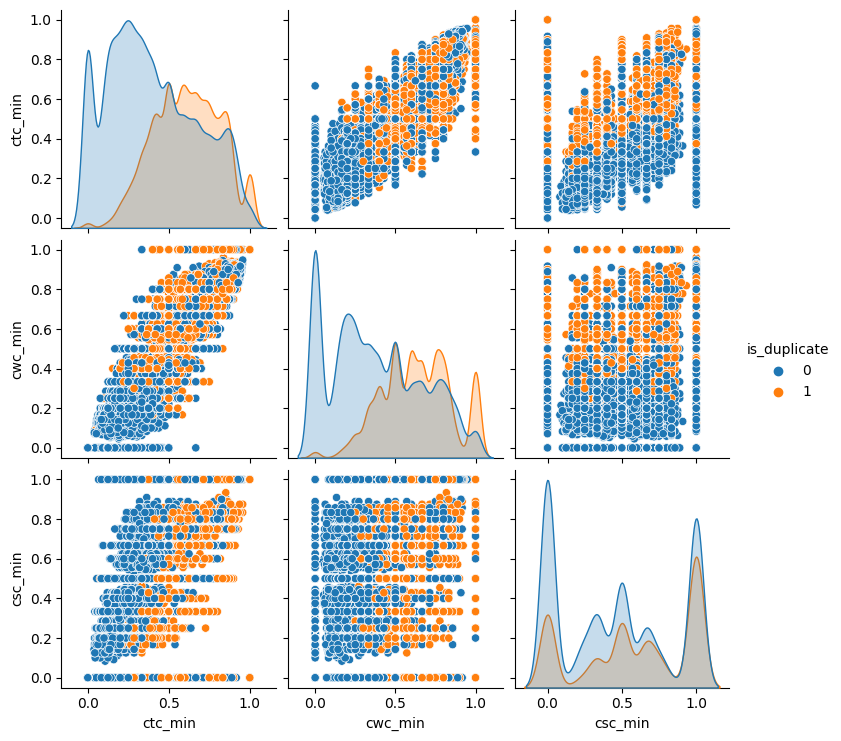

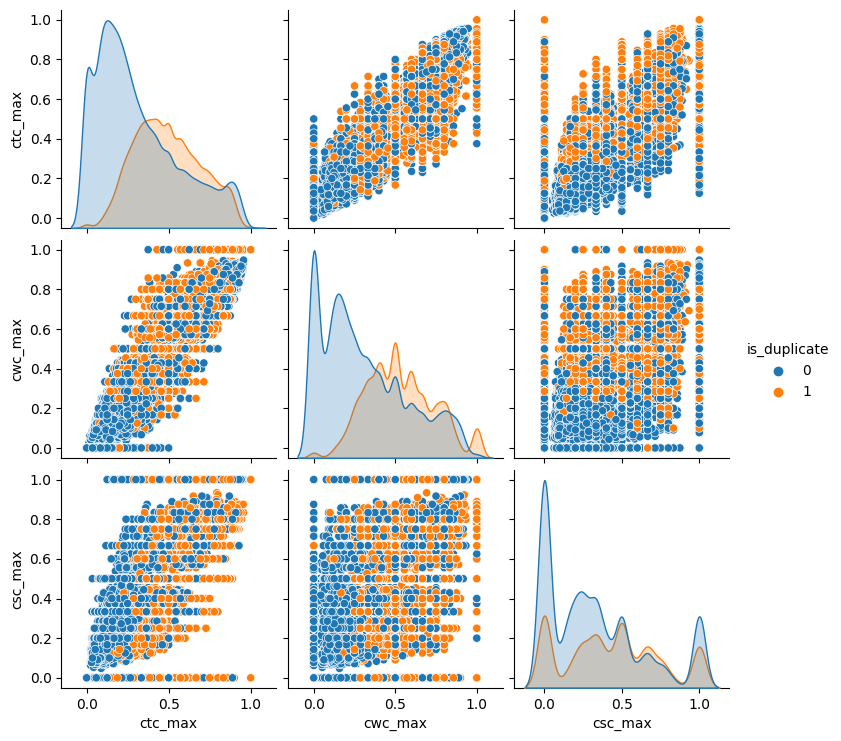

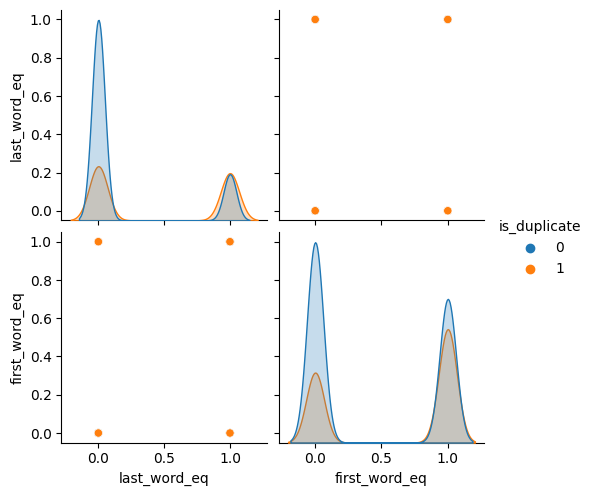

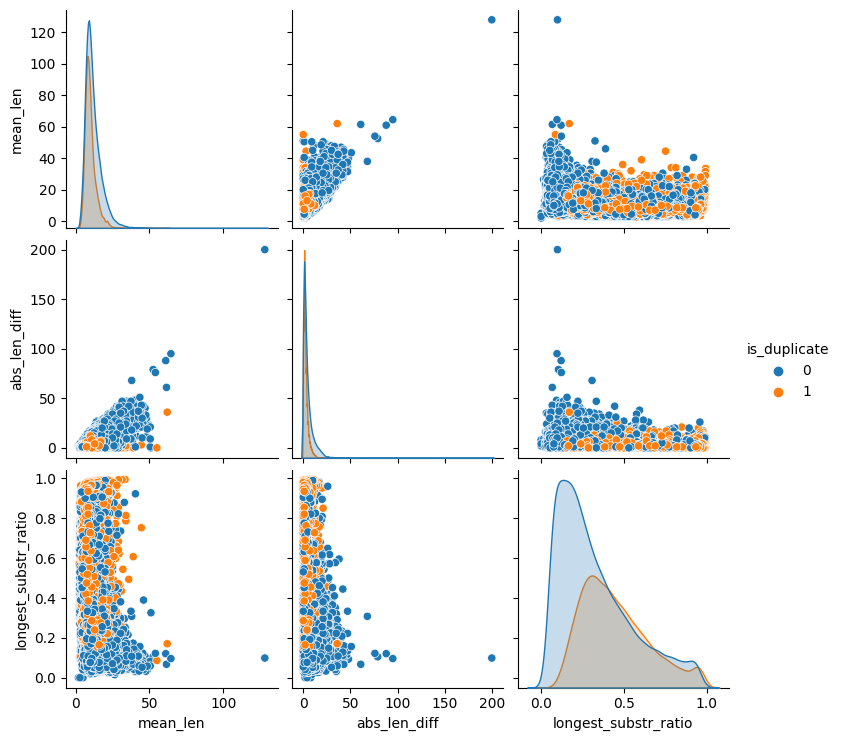

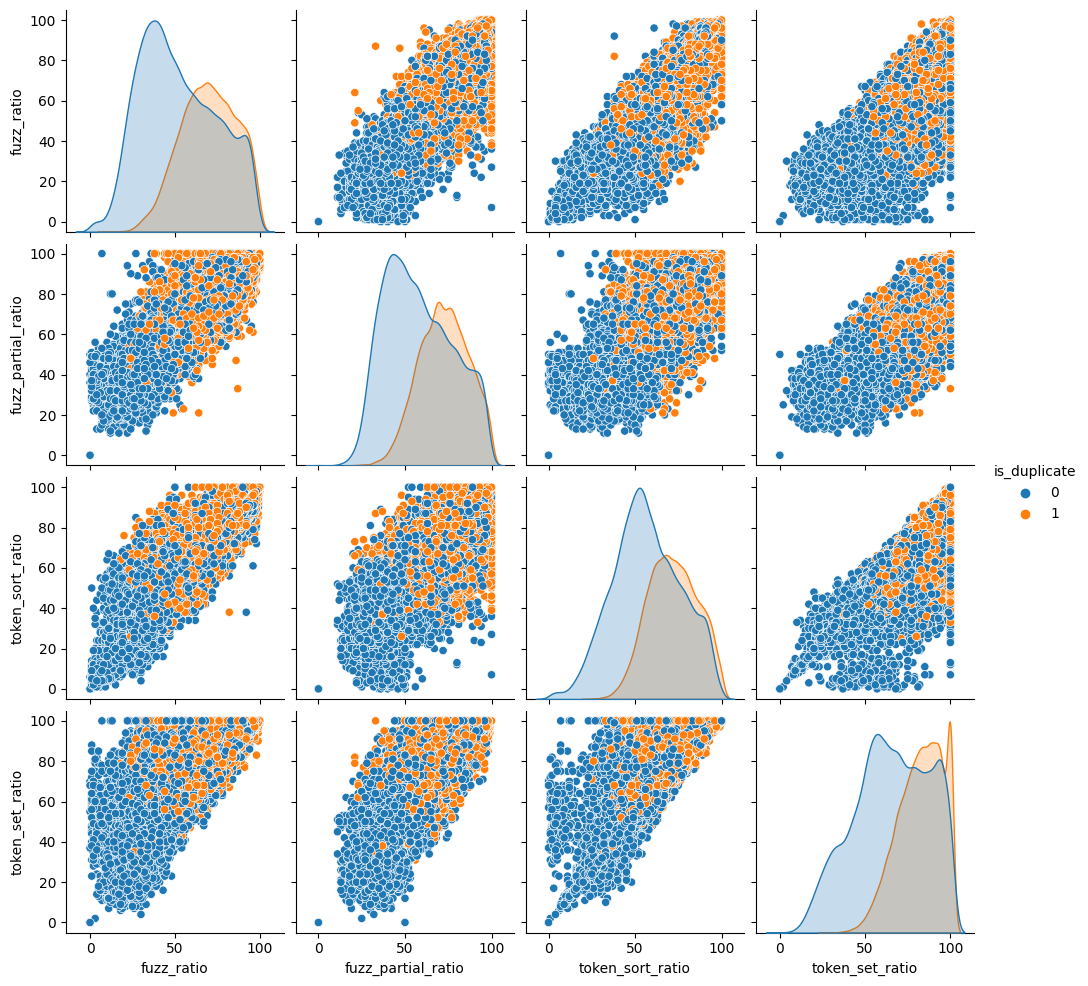

In [239]:
print(sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']], hue='is_duplicate'))
print(sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']], hue='is_duplicate'))
print(sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']], hue='is_duplicate'))
print(sns.pairplot(new_df[['mean_len', 'abs_len_diff', 'longest_substr_ratio', 'is_duplicate']], hue='is_duplicate'))
print(sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio', 'token_set_ratio', 'is_duplicate']], hue='is_duplicate'))


In [240]:
from sklearn.preprocessing import MinMaxScaler
#Scaling the numbers from 0 to 1 
X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values
ques_df = new_df[['question1','question2']]
print(ques_df.head())
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()
#only the important columns and the reason we dropped these features is because the algorithm doesn't care about the lines, we have useful number and columns we wanted and it is the time we are doing something predictable

                                                question1  \
8067                    how do i play pokémon go in korea   
368101  what are some of the best side dishes for crab...   
70497   which is more advisable and better material fo...   
226567        how do i improve logical programming skills   
73186               how close we are to see 3rd world war   

                                                question2  
8067                    how do i play pokémon go in china  
368101  what are some good side dishes for buffalo chi...  
70497        what is the best server setup for buddypress  
226567  how can i improve my logical skills for progra...  
73186                        how close is a world war iii  
(50000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
8067,0,33,33,8,8,7,16,0.44,0.833319,0.833319,...,0.874989,0,1,0,8.0,0.800000,88,88,81,90
368101,0,52,50,11,9,6,20,0.30,0.499992,0.499992,...,0.545450,0,1,2,10.0,0.326923,73,73,73,73
70497,0,95,44,17,8,2,24,0.08,0.000000,0.000000,...,0.124999,0,0,8,12.0,0.108696,35,44,36,24
226567,1,43,51,7,9,4,16,0.25,0.666656,0.666656,...,0.444440,0,1,2,8.0,0.266667,72,68,89,96
73186,1,37,28,9,7,3,16,0.19,0.399992,0.333328,...,0.222220,0,1,2,8.0,0.333333,68,59,71,81


In [241]:
#merge text in a simgle list
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()


(50000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,33,33,8,8,7,16,0.44,0.833319,0.833319,...,0,0,0,0,0,0,0,0,0,0
368101,0,52,50,11,9,6,20,0.30,0.499992,0.499992,...,0,0,0,0,0,0,0,0,0,0
70497,0,95,44,17,8,2,24,0.08,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
226567,1,43,51,7,9,4,16,0.25,0.666656,0.666656,...,0,0,0,0,0,0,0,0,0,0
73186,1,37,28,9,7,3,16,0.19,0.399992,0.333328,...,0,0,0,0,0,0,0,0,0,0


In [242]:
#Now we train the model with the first algorithm
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7966

#Improved the accuracy to 80 % with advanced features

In [243]:
#Now with the second algorithm
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7986

In [259]:
!ls

 app.py		      helper.py     requirements.txt
'Component 7-2.png'   model.pkl     setup.sh
 cv.pkl		      __pycache__   stopwords.pkl


So what we are understanding from this? We are understanding that with all these advanced features that they have created, token features, length-based features, and fuzzy features from the library FuzzyWuzzy, we have increased the accuracy to 78 to 79 percent in both the algorithms combined on average.

In [185]:
#Now we are gonna evaluate the algorithm based using confusion matrix and  even though the accuracy is higher in XGboost but still it is better to use randomforest, Why?
from sklearn.metrics import confusion_matrix
# for random forest model
print(confusion_matrix(y_test,y_pred))
# for xgboost model
print(confusion_matrix(y_test,y_pred1))

[[3715  739]
 [ 747 1799]]
[[3724  730]
 [ 696 1850]]


   #Those numbers like 3206, 567, 737, and 1490 are not random at all — they come directly from your test data.
   #This matrix [[3206  567]
 #[ 737 1490]] represent that out of all the test data, how many of the data points - The model guessed "not duplicate", and it was right(3206),
 #how many - The model guessed "duplicate", but it was wrong (they weren’t(567), how many The model guessed "not duplicate", but it was wrong (they were!)(737)
 #and the last how many - The model guessed "duplicate", and it was right(1490)
 #So here we don't have to focus on the numbers 3206-3146 and 1490-1617 because they are representing correct classification and we have to focus on mis classification
 #which are the other 2 numbers So here, false positive is a big deal. The number 567 And 627 is a big deal
 #because they are representing false positive. That means if we are predicting duplicate,
  #but in reality they were not duplicate And in the end, all are going to merge and then the user experience
  #is going to fall down because the accuracy is going to fall down and we will not get the right results.
  #And the second is The false negative in which we have guessed like the model in this context has guessed
  #that it is not duplicate but it was duplicate in real so it doesn't get merged and the user experience will
  #not fall that much because in the end it is not getting merged so we are not getting any kind of results
  #or anything like that. So false positive is a big deal than false negative.

In [186]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))
def test_fetch_token_features(q1,q2):

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features




def test_fetch_length_features(q1,q2):

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features




def test_fetch_fuzzy_features(q1,q2):

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)
    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features




def query_point_creator(q1,q2):

    input_query = []

    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)

    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))

    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))

    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))

    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)

    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)

    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)

    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()



    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))



#trying the model, so that we can assist the interface in our mind
q1 = 'Where is the capital of India?'
q2 = 'what is the current capital of pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'what is the  capital of India?'
rf.predict(query_point_creator(q1,q2))


array([0])

In [187]:
import pickle

# Save model to working directory
with open('/kaggle/working/model.pkl', 'wb') as f:
    pickle.dump(rf, f)

with open('/kaggle/working/cv.pkl', 'wb') as f:
    pickle.dump(cv, f)

#we are writing this piece of code so that we don't have to retraing the model even if we create a website on this  dataset using streamlit

In [188]:
import os
os.listdir('/kaggle/working')

['stopwords.pkl',
 'cv.pkl',
 'model.pkl',
 '__pycache__',
 'helper.py',
 'app.py',
 '.virtual_documents']

In [189]:
#Now our model is ready so we have to make a website using streamlit so that users can interact with it easily
#But first we save

In [190]:
%%writefile app.py
import streamlit as st
import helper
import pickle

# Set the page configuration
st.set_page_config(
    page_title="RepliCheck",            # Title in browser tab
    page_icon="Component 7-2.png",      # Custom favicon (must be in the same directory or give path)
    layout="centered"
)

# Load the model
model = pickle.load(open('model.pkl', 'rb'))

# Custom CSS for dark theme and layout
st.markdown("""
    <style>
        .stApp {
            background-color: #000000;
            font-family: 'Arial', sans-serif;
        }
        .header {
            font-size: 28px;
            color: #5b3939;
            text-align: center;
            margin-top: 10px;
            margin-bottom: 30px;
            font-weight: 700
        }
        .result {
            font-size: 30px;
            font-weight: bold;
            text-align: center;
            margin-top: 30px;
        }
        .footer {
            text-align: center;
            margin-top: 40px;
            font-size: 14px;
            color: #aaaaaa;
        }
        .input-box {
            margin: auto;
            padding: 20px;
            border-radius: 10px;
            background-color: #1a1a1a;
            box-shadow: 0 4px 8px rgba(255, 255, 255, 0.05);
            width: 80%;
        }
        .prediction-text {
            color: #e74c3c;
        }
        /* Center logo */
        .center-logo {
            display: flex;
            justify-content: center;
            margin-bottom: 10px;
        }
    </style>
""", unsafe_allow_html=True)

# Display logo at top (replacing the RepliCheck text title)
# Centered logo using columns
col1, col2, col3 = st.columns([1, 2, 1])
with col2:
    st.image("Component 7-2.png", width=200)

# Header
st.markdown("<div class='header'>Enter Two Questions to Check for Duplication</div>", unsafe_allow_html=True)

# Input fields
with st.container():
    q1 = st.text_input('Enter Question 1', key="q1", placeholder="Type your first question here...", label_visibility="collapsed")
    q2 = st.text_input('Enter Question 2', key="q2", placeholder="Type your second question here...", label_visibility="collapsed")

# Prediction
if q1 and q2:
    query = helper.query_point_creator(q1, q2)
    result = model.predict(query)[0]

    if result:
        st.markdown("<div class='result prediction-text'>Duplicate</div>", unsafe_allow_html=True)
    else:
        st.markdown("<div class='result' style='color:#2ecc71;'>Not Duplicate</div>", unsafe_allow_html=True)

# Footer
st.markdown("<div class='footer'>Made with passion by Sam | RepliCheck</div>", unsafe_allow_html=True)


Overwriting app.py


In [199]:
#now the code 
import streamlit as st
import helper
import pickle

# Set the page configuration
st.set_page_config(
    page_title="RepliCheck",            # Title in browser tab
    page_icon="Component 7-2.png",      # Custom favicon (must be in the same directory or give path)
    layout="centered"
)

# Load the model
model = pickle.load(open('model.pkl', 'rb'))

# Custom CSS for dark theme and layout
st.markdown("""
    <style>
        .stApp {
            background-color: #000000;
            font-family: 'Arial', sans-serif;
        }
        .header {
            font-size: 28px;
            color: #5b3939;
            text-align: center;
            margin-top: 10px;
            margin-bottom: 30px;
            font-weight: 700
        }
        .result {
            font-size: 30px;
            font-weight: bold;
            text-align: center;
            margin-top: 30px;
        }
        .footer {
            text-align: center;
            margin-top: 40px;
            font-size: 14px;
            color: #aaaaaa;
        }
        .input-box {
            margin: auto;
            padding: 20px;
            border-radius: 10px;
            background-color: #1a1a1a;
            box-shadow: 0 4px 8px rgba(255, 255, 255, 0.05);
            width: 80%;
        }
        .prediction-text {
            color: #e74c3c;
        }
        /* Center logo */
        .center-logo {
            display: flex;
            justify-content: center;
            margin-bottom: 10px;
        }
    </style>
""", unsafe_allow_html=True)

# Display logo at top (replacing the RepliCheck text title)
# Centered logo using columns
col1, col2, col3 = st.columns([1, 2, 1])
with col2:
  import shutil
  shutil.copy("/kaggle/input/logoforwebsite/Component 7-2.png", "Component 7-2.png")
  st.image("Component 7-2.png", width=200)
# Header
st.markdown("<div class='header'>Enter Two Questions to Check for Duplication</div>", unsafe_allow_html=True)

# Input fields
with st.container():
    q1 = st.text_input('Enter Question 1', key="q1", placeholder="Type your first question here...", label_visibility="collapsed")
    q2 = st.text_input('Enter Question 2', key="q2", placeholder="Type your second question here...", label_visibility="collapsed")

# Prediction
if q1 and q2:
    query = helper.query_point_creator(q1, q2)
    result = model.predict(query)[0]

    if result:
        st.markdown("<div class='result prediction-text'>Duplicate</div>", unsafe_allow_html=True)
    else:
        st.markdown("<div class='result' style='color:#2ecc71;'>Not Duplicate</div>", unsafe_allow_html=True)

# Footer
st.markdown("<div class='footer'>Made with passion by Sam | RepliCheck</div>", unsafe_allow_html=True)


2025-05-08 09:22:52.616 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 09:22:52.975 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 09:22:52.977 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 09:22:52.980 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 09:22:52.982 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 09:22:52.983 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 09:22:52.984 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 09:22:53.000 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [195]:
!pip install pyngrok

In [200]:
from pyngrok import ngrok
import os
import threading

# Set the port where Streamlit will run
port = 8501

# Open an ngrok tunnel
public_url = ngrok.connect(port)
print("Streamlit app running at:", public_url)

# Run Streamlit in a new thread
def run():
    os.system(f"streamlit run app.py --server.port {port}")

threading.Thread(target=run).start()


Streamlit app running at: NgrokTunnel: "https://02e4-34-74-179-199.ngrok-free.app" -> "http://localhost:8501"


2025-05-08 09:22:57.634 Port 8501 is already in use
/kaggle/working/helper.py:275: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 275 of the file /kaggle/working/helper.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  q = BeautifulSoup(q)
/kaggle/working/helper.py:275: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 275 of the file /kaggle/

In [202]:
!free -h#to know how much usage this model took

               total        used        free      shared  buff/cache   available
Mem:            31Gi        19Gi       8.9Gi       0.0Ki       3.3Gi        11Gi
Swap:             0B          0B          0B


**Now deploying part**

In [203]:
%%writefile requirements.txt
streamlit
sklearn
fuzzywuzzy
distance
bs4

Writing requirements.txt


In [205]:
%%writefile setup.sh
mkdir -p ~/.streamlit/

echo "\
[server]\n\
port = $PORT\n\
enableCORS = false\n\
headless = true\n\
\n\
" > ~/.streamlit/config.toml

Writing setup.sh
